In [1]:
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = 'bluebear78'
os.environ['KAGGLE_KEY'] = '39d305f791ce074d3a7f8d5630fecba2'

In [3]:
!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.48G/1.49G [00:07<00:00, 137MB/s]
100% 1.49G/1.49G [00:07<00:00, 218MB/s]


In [4]:
!unzip *.*

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/VERMILION FLYCATHER/102.jpg  
  inflating: train/VERMILION FLYCATHER/103.jpg  
  inflating: train/VERMILION FLYCATHER/104.jpg  
  inflating: train/VERMILION FLYCATHER/105.jpg  
  inflating: train/VERMILION FLYCATHER/106.jpg  
  inflating: train/VERMILION FLYCATHER/107.jpg  
  inflating: train/VERMILION FLYCATHER/108.jpg  
  inflating: train/VERMILION FLYCATHER/109.jpg  
  inflating: train/VERMILION FLYCATHER/110.jpg  
  inflating: train/VERMILION FLYCATHER/111.jpg  
  inflating: train/VERMILION FLYCATHER/112.jpg  
  inflating: train/VERMILION FLYCATHER/113.jpg  
  inflating: train/VERMILION FLYCATHER/114.jpg  
  inflating: train/VERMILION FLYCATHER/115.jpg  
  inflating: train/VERMILION FLYCATHER/116.jpg  
  inflating: train/VERMILION FLYCATHER/117.jpg  
  inflating: train/VERMILION FLYCATHER/118.jpg  
  inflating: train/VERMILION FLYCATHER/119.jpg  
  inflating: train/VERMILION FLYCATHER/120.jpg  
  inflating: train/VERMILION FLYC

In [5]:
import pandas as pd

In [111]:
df_latin_names = pd.read_csv("./birds_latin_names.csv")
df_birds = pd.read_csv("./birds.csv")
df_class_dict = pd.read_csv("./class_dict.csv")

In [75]:
df_latin_names.head()

,class_index,class,SCIENTIFIC NAME
0,0,ABBOTTS BABBLER,Malacocincla abbotti
1,1,ABBOTTS BOOBY,Papasula abbotti
2,2,ABYSSINIAN GROUND HORNBILL,Bucorvus abyssinicus
3,3,AFRICAN CROWNED CRANE,Balearica regulorum
4,4,AFRICAN EMERALD CUCKOO,Chrysococcyx cupreus


In [76]:
df_birds.head()

,class index,filepaths,labels,data set
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,train
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,train
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,train


In [77]:
df_class_dict.head()

,class_index,class,height,width,scale by,Offset
0,0,ABBOTTS BABBLER,112,112,1,0
1,1,ABBOTTS BOOBY,112,112,1,0
2,2,ABYSSINIAN GROUND HORNBILL,112,112,1,0
3,3,AFRICAN CROWNED CRANE,112,112,1,0
4,4,AFRICAN EMERALD CUCKOO,112,112,1,0


In [78]:
len(df_class_dict)

400

In [79]:
len(df_birds)

62388

In [80]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as stl
stl.use("ggplot")
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import ImageDataGenerator

In [81]:
df_birds.head()

,class index,filepaths,labels,data set
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,train
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,train
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,train


In [82]:
data = df_birds.sort_values(by=['labels'],ascending=True)

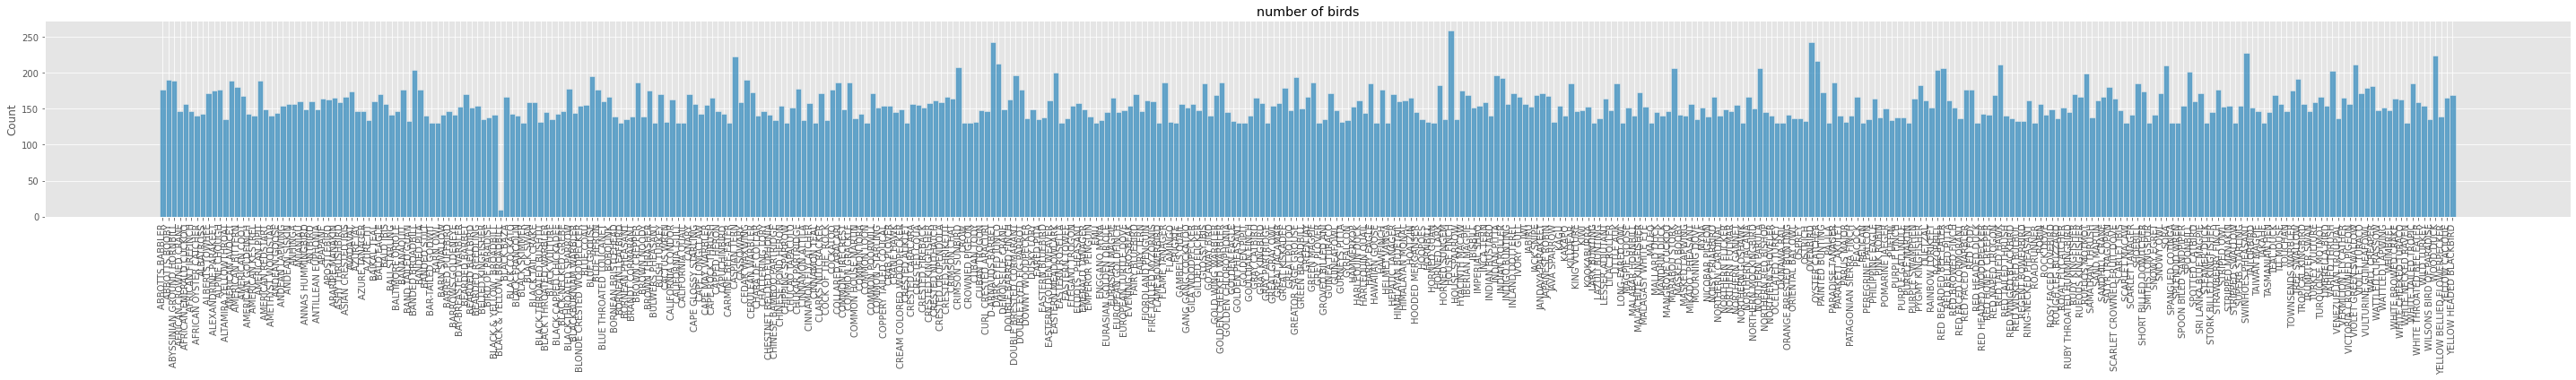

In [83]:
X = data['labels'].tolist()
plt.figure(figsize=(40,6))
sns.histplot(x=X)
plt.xticks(rotation=90)
plt.title("number of birds")
plt.tight_layout()
plt.show()

In [84]:
len(X)

62388

In [85]:
labels = data['labels']

In [86]:
too_low_dataset = labels.value_counts()<50

In [87]:
too_low_dataset[too_low_dataset==True]

BLACK & YELLOW BROADBILL    True
Name: labels, dtype: bool

In [112]:
df_birds.drop(df_birds[df_birds['labels']=='BLACK & YELLOW BROADBILL'].index,inplace=True)

In [157]:
!rm "/content/train/BLACK & YELLOW  BROADBILL" -r

In [93]:
!rm "./valid/BLACK & YELLOW BROADBILL" -r
!rm "./test/BLACK & YELLOW BROADBILL" -r

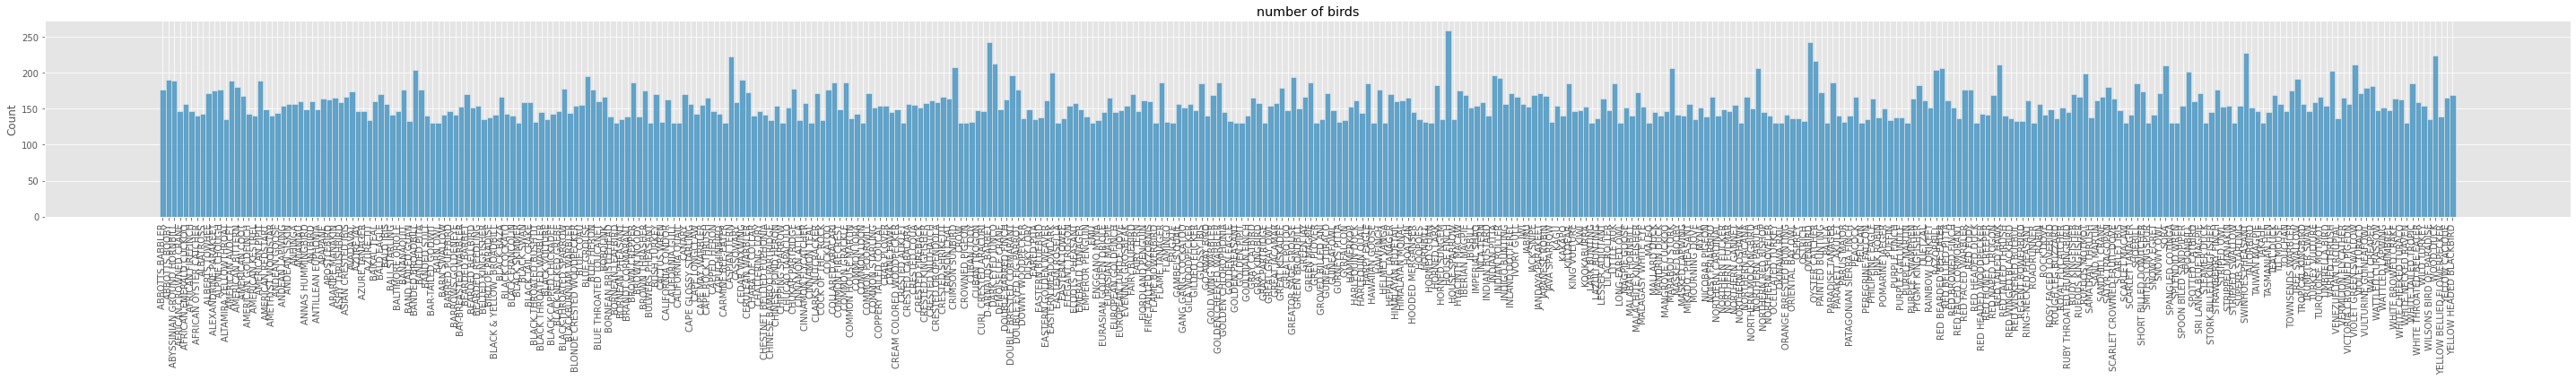

In [113]:
data = df_birds.sort_values(by=['labels'],ascending=True)
X = data['labels'].tolist()
plt.figure(figsize=(40,6))
sns.histplot(x=X)
plt.xticks(rotation=90)
plt.title("number of birds")
plt.tight_layout()
plt.show()

In [115]:
df_train = df_birds[df_birds['data set']=='train']
df_valid = df_birds[df_birds['data set']=='valid']
df_test = df_birds[df_birds['data set']=='test']

In [117]:
df_train.drop(['class index','data set'],axis=1,inplace=True)
df_valid.drop(['class index','data set'],axis=1,inplace=True)
df_test.drop(['class index','data set'],axis=1,inplace=True)

In [118]:
df_train.head()

,filepaths,labels
0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER
1,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER
2,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER
3,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER
4,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER


In [120]:
df_valid.head()

,filepaths,labels
60388,valid/ABBOTTS BABBLER/1.jpg,ABBOTTS BABBLER
60389,valid/ABBOTTS BABBLER/2.jpg,ABBOTTS BABBLER
60390,valid/ABBOTTS BABBLER/3.jpg,ABBOTTS BABBLER
60391,valid/ABBOTTS BABBLER/4.jpg,ABBOTTS BABBLER
60392,valid/ABBOTTS BABBLER/5.jpg,ABBOTTS BABBLER


In [119]:
df_test.head()

,filepaths,labels
58388,test/ABBOTTS BABBLER/1.jpg,ABBOTTS BABBLER
58389,test/ABBOTTS BABBLER/2.jpg,ABBOTTS BABBLER
58390,test/ABBOTTS BABBLER/3.jpg,ABBOTTS BABBLER
58391,test/ABBOTTS BABBLER/4.jpg,ABBOTTS BABBLER
58392,test/ABBOTTS BABBLER/5.jpg,ABBOTTS BABBLER


In [36]:
import matplotlib.image as mpimg
import random

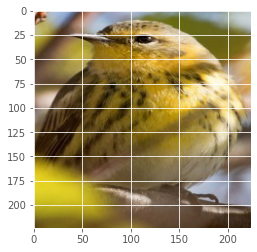

In [42]:
img = mpimg.imread(random.choice(df_birds['filepaths']))
plt.imshow(img)

In [124]:
len(df_train['labels'].value_counts())

400

400종의 새를 분류해야함

In [125]:
len(df_valid['labels'].value_counts())

399

In [126]:
len(df_test['labels'].value_counts())

399

In [131]:
def GetDifferences(df1, df2):
  df = pd.concat([df1, df2]).reset_index(drop=True)
  idx = [diff[0] for diff in df.groupby(list(df.columns)).groups.values() if len(diff) == 1]
  return df.reindex(idx)

In [ ]:
df_train['labels'].unique()

In [142]:
set(df_train['labels'].unique()) - set(df_valid['labels'].unique())

{'BLACK & YELLOW  BROADBILL'}

In [143]:
set(df_train['labels'].unique()) - set(df_test['labels'].unique())

{'BLACK & YELLOW  BROADBILL'}

In [148]:
df_train.drop(df_train[df_train['labels']=='BLACK & YELLOW  BROADBILL'].index,inplace=True,axis=0)

In [150]:
print(len(df_train['labels'].value_counts()))
print(len(df_valid['labels'].value_counts()))
print(len(df_test['labels'].value_counts()))

399
399
399


In [152]:
from glob import glob

In [158]:
folder = glob('./train/*')

In [159]:
len(folder)

399

In [160]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("./train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("./test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58246 images belonging to 399 classes.
Found 1995 images belonging to 399 classes.


In [161]:
print(len(training_set))
print(len(test_set))

1821
63


In [164]:
from keras.applications.resnet_v2 import ResNet50V2

In [171]:
resNet = ResNet50V2(weights='imagenet',input_shape=(224,224,3),include_top=False)

94683136/94668760 [==============================] - 1s 0us/step


In [172]:
resNet.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [173]:
for layer in resNet.layers:
  layer.trainable=False

In [174]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

In [179]:
x = Flatten()(resNet.output)
x = Dense(len(folder), activation='softmax')(x)

In [180]:
model =Model(inputs=resNet.input,outputs=x)

In [181]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [183]:
r = model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/5
1821/1821 [==============================] - 844s 463ms/step - loss: 21.9001 - accuracy: 0.6458 - val_loss: 9.7124 - val_accuracy: 0.8130
Epoch 2/5
1821/1821 [==============================] - 825s 453ms/step - loss: 13.2236 - accuracy: 0.8072 - val_loss: 9.4049 - val_accuracy: 0.8591
Epoch 3/5
1821/1821 [==============================] - 812s 446ms/step - loss: 10.8136 - accuracy: 0.8535 - val_loss: 7.9133 - val_accuracy: 0.8907
Epoch 4/5
1821/1821 [==============================] - 817s 449ms/step - loss: 9.0057 - accuracy: 0.8836 - val_loss: 9.7434 - val_accuracy: 0.8877
Epoch 5/5
1821/1821 [==============================] - 826s 454ms/step - loss: 7.6316 - accuracy: 0.9041 - val_loss: 10.0270 - val_accuracy: 0.8867


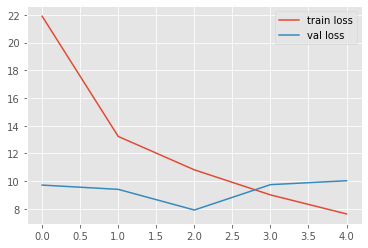

In [184]:
# shows loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

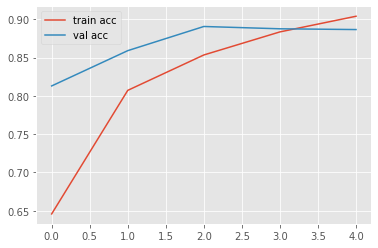

In [185]:
# shows accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()